# Linear Regression

This tutorial shows how simple it is to implement a linear regression in python.

1) We need some data so create an array x with shape (100,1) that contains the numbers from -5 to 5.

2) Initialize the random number generator of numpy to 42.

3) Now add Gaussian random noise to x with a standard deviation of 1 and store the result in an array y.

4) Plot the datapoints as blue dots in the range $x\in[-10,10]$ and $y\in[-10,10]$

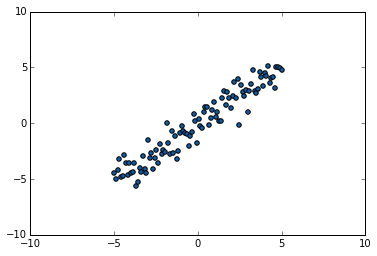

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

X = np.linspace(-5, 5, 100).reshape(-1, 1)
Y = X + np.random.normal(0, 1, X.shape)

def plot_data(X, Y, limits):
    plt.scatter(X, Y, c='#115EA6')
    plt.xlim(limits[0], limits[1])
    plt.ylim(limits[2], limits[3])
    plt.show()

plot_data(X, Y, [-10, 10, -10, 10])

A linear regression for datapoint matrix $X$ ($D \times N$, D datapoints and N input dimensions) and target matrix $Y$ ($D \times M$, D datapoints and M output dimensions) is defined as:

$min \frac{1}{2}\left(A\vec{x}-\vec{y}\right)^2$

We ignore the bias value for now!

1) Set the derivative to zero and solve the equation for $A$ to get the optima $A^*$. (Hint: If you have problems with the closed form solution with abitray dimensions, first solve the equation for 1D input and output)

2) Now plot the resulting

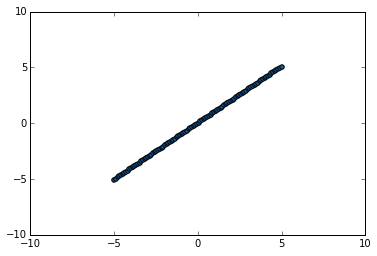

[[ 1.01379327]]


In [52]:
def regress(X, Y):
    x_dim = X.shape[1]
    y_dim = Y.shape[1]
    A_1 = np.zeros( (y_dim, x_dim) )
    A_2 = np.zeros( (x_dim, x_dim) )

    for k in range(0, X.shape[0]):
        A_1 += np.outer(Y[k,:], X[k,:])
        A_2 += np.outer(X[k,:], X[k,:])
    A_2 = np.linalg.inv(A_2)

    return np.dot(A_1, A_2)

A = regress(X, Y)
Y_predicted = (np.dot(A, X.T)).T
plot_data(X, Y_predicted, [-10, 10, -10, 10])
print(A)

A commen way to integrate a bias value for many machine learning methods is to add a dimension which is constant one for all datapoints!

1) Modify the code by adding a second constant dimension to x and add 10 to y to shift the datapoints verctically.

2) Now plot the result in the range $x\in[-10,10]$ and $y\in[0,20]$, notice that you have to select the first dimension of x in order not to plot the constant dimension!

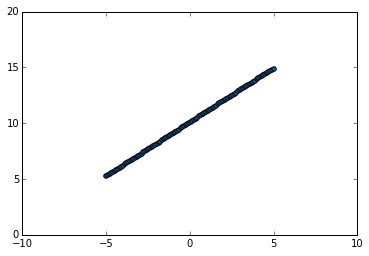

[[  0.9668773   10.06489625]]


In [93]:
X = np.linspace(-5, 5, 100).reshape(-1, 1)
Y = X + np.random.normal(0, 1, X.shape)
X = np.hstack( [X, np.ones((X.shape))] )
Y += 10

A = regress(X, Y)
Y_predicted = (np.dot(A, X.T)).T
plot_data(X[:,0], Y_predicted, [-10, 10, 0, 20])
print(A)

By using a polynomial expansion of x we can fit a polynome to the data.

Fit a ploynome of degree 5 to the data 

In [95]:
def expanded(X, degree):
    new_dim = np.polynomial.polynomial.polypow(X[0], degree).size
    X_expanded = np.empty((X.shape[0], new_dim))
    
    for k in range(X.shape[0]):
        X_expanded[k] = np.polynomial.polynomial.polypow(X[k], degree)
    
    return X_expanded

X = expanded(X, 5)

(100L, 6L)


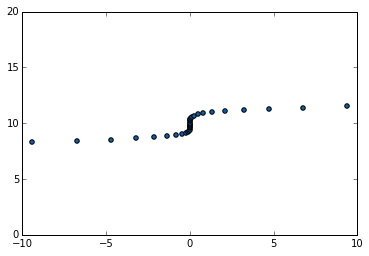

[[  5.08315844e-04   1.53706966e-04  -1.37920445e-03   7.30615847e-04
    2.07250613e-01   9.90280739e+00]]


In [96]:
print(X.shape)
A = regress(X, Y)
Y_predicted = (np.dot(A, X.T)).T
plot_data(X[:,0], Y_predicted, [-10, 10, 0, 20])
print(A)

Now perform the same using the linear regression function np.polyfit(x,y,5) of numpy. Notice that x,y are 1D arrays here! 